<a href="https://colab.research.google.com/github/syakiraghina/syakiraghina.github.io/blob/main/sql_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
con = sqlite3.connect('/content/drive/MyDrive/database.sqlite')

In [ ]:
# https://www.kaggle.com/code/janzasadny/pitchfork-reviews-eda
# https://www.kaggle.com/code/janzasadny/pitchfork-reviews-eda
# https://www.kaggle.com/code/bradswindell/pitchfork-sql-db-pandas-analysis-and-data-vis

In [ ]:
# Load database tables to separate dataframes
df_artists = pd.read_sql_query("SELECT * FROM artists", con, index_col="reviewid")
df_content = pd.read_sql_query("SELECT * FROM content", con, index_col="reviewid")
df_genres = pd.read_sql_query("SELECT * FROM genres", con, index_col="reviewid")
df_labels = pd.read_sql_query("SELECT * FROM labels", con, index_col="reviewid")
df_reviews = pd.read_sql_query("SELECT * FROM reviews", con, index_col="reviewid")
df_years = pd.read_sql_query("SELECT * FROM years", con, index_col="reviewid")

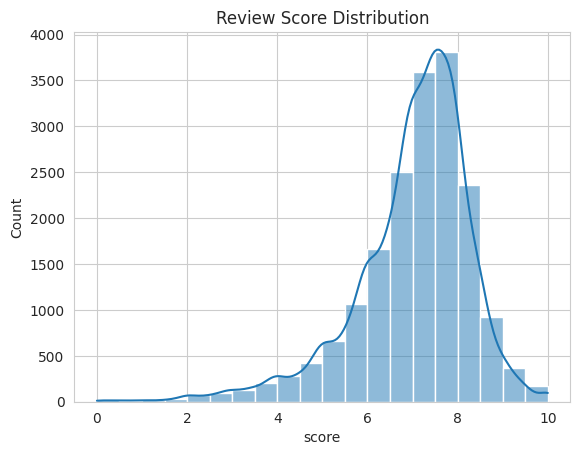

In [ ]:
sns.set_style('whitegrid')
sns.histplot(data = df_reviews , x = 'score',bins = 20, kde = True)
plt.title('Review Score Distribution')
plt.show()

In [ ]:
genre_review = pd.merge(df_genres['genre'],df_reviews['score'],on = 'reviewid',how = 'outer').reset_index()
genre_count = genre_review.groupby('genre')['score'].count()
genre_count

genre
electronic      3874
experimental    1815
folk/country     685
global           219
jazz             435
metal            862
pop/r&b         1432
rap             1559
rock            9438
Name: score, dtype: int64

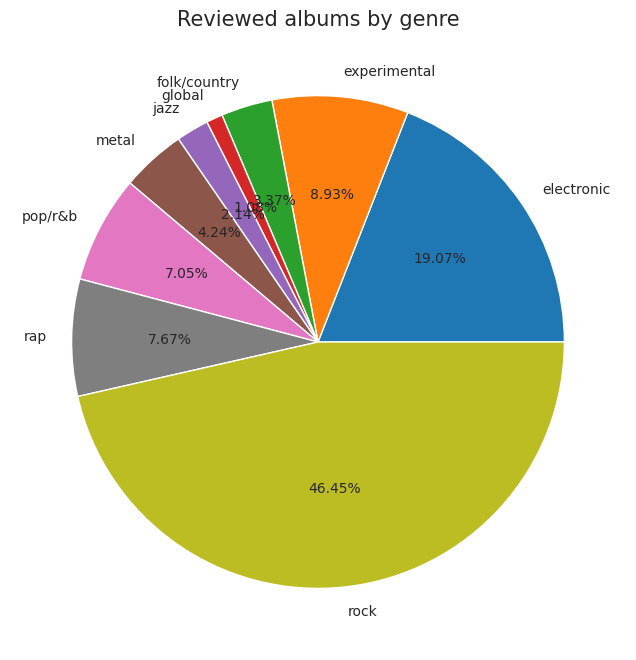

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(genre_count,labels = genre_count.index,autopct ="%.2f%%")
plt.title('Reviewed albums by genre',fontsize = 15)
plt.show()

In [ ]:
genre_score = genre_review.groupby('genre')['score'].mean().sort_values(ascending = False)
genre_score

genre
global          7.429680
experimental    7.336694
jazz            7.303908
folk/country    7.202190
metal           6.950000
rock            6.942011
electronic      6.920702
rap             6.900513
pop/r&b         6.883799
Name: score, dtype: float64

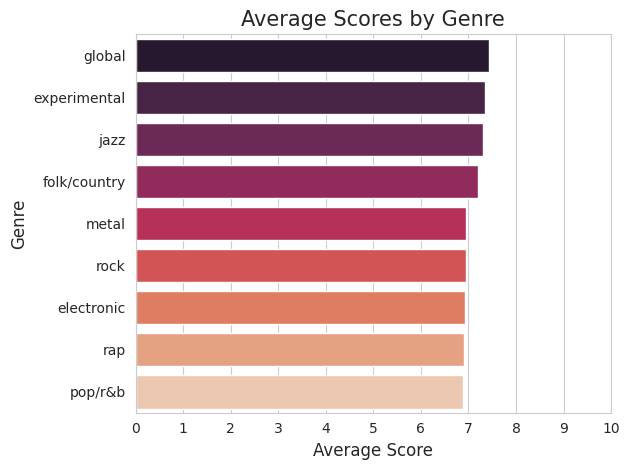

In [ ]:
sns.barplot(x = genre_score , y = genre_score.index , palette='rocket')
plt.title('Average Scores by Genre',fontsize = 15)
plt.xlabel('Average Score',fontsize = 12)
plt.ylabel('Genre',fontsize = 12)
plt.xticks(np.arange(0.0, 11.0, 1.0), fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
artist_review = pd.merge(df_artists['artist'],df_reviews['score'],on = 'reviewid',how = 'outer').reset_index()
artist_score = artist_review.groupby('artist')['score'].agg(['mean','count']).sort_values(by = 'mean',ascending = False).reset_index()[0:10]
artist_score

,artist,mean,count
0,television,10.00,1
1,the stone roses,10.00,1
2,stevie wonder,10.00,1
3,talk talk,10.00,1
4,slint,10.00,1
5,elvis costello & the attractions,9.75,2
6,dangelo,9.70,2
7,n.w.a.,9.70,1
8,ultramagnetic mc's,9.70,1
9,my bloody valentine,9.55,2


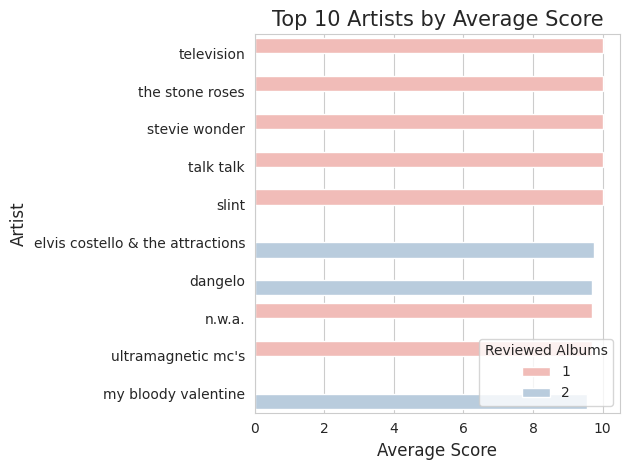

In [ ]:
sns.barplot(x = artist_score['mean'], y = artist_score['artist'], palette = 'Pastel1', hue = artist_score['count'])
plt.title('Top 10 Artists by Average Score',fontsize = 15)
plt.xlabel('Average Score',fontsize = 12)
plt.ylabel('Artist',fontsize = 12)
plt.legend(title = 'Reviewed Albums',loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
bnw = pd.merge(df_artists['artist'],df_reviews['best_new_music'],on = 'reviewid',how = 'outer').reset_index()
artist_bnw = bnw.groupby('artist')['best_new_music'].agg(['count']).sort_values(by = 'count',ascending = False).reset_index()[0:10]
artist_bnw

,artist,count
0,various artists,690
1,guided by voices,23
2,neil young,23
3,bonnie prince billy,22
4,david bowie,21
5,the beatles,21
6,gucci mane,20
7,mogwai,20
8,of montreal,20
9,robert pollard,19


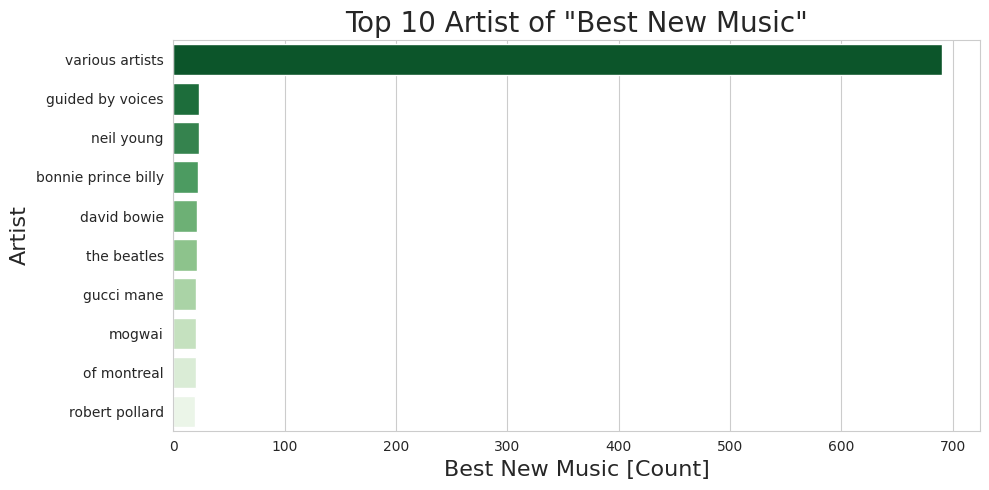

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = artist_bnw['count'] , y = artist_bnw['artist'],palette = 'Greens_r',dodge = False)
plt.title('Top 10 Artist of "Best New Music"',fontsize = 20)
plt.xlabel('Best New Music [Count]',fontsize = 16)
plt.ylabel('Artist',fontsize = 16)
plt.tight_layout()
plt.show()

In [ ]:
review_year = df_reviews.groupby('pub_year')['title'].agg(['count']).sort_values(by = 'count',ascending = False).reset_index()
review_year

,pub_year,count
0,2016,1265
1,2007,1216
2,2008,1201
3,2013,1200
4,2006,1189
5,2005,1186
6,2012,1185
7,2009,1171
8,2010,1170
9,2011,1165


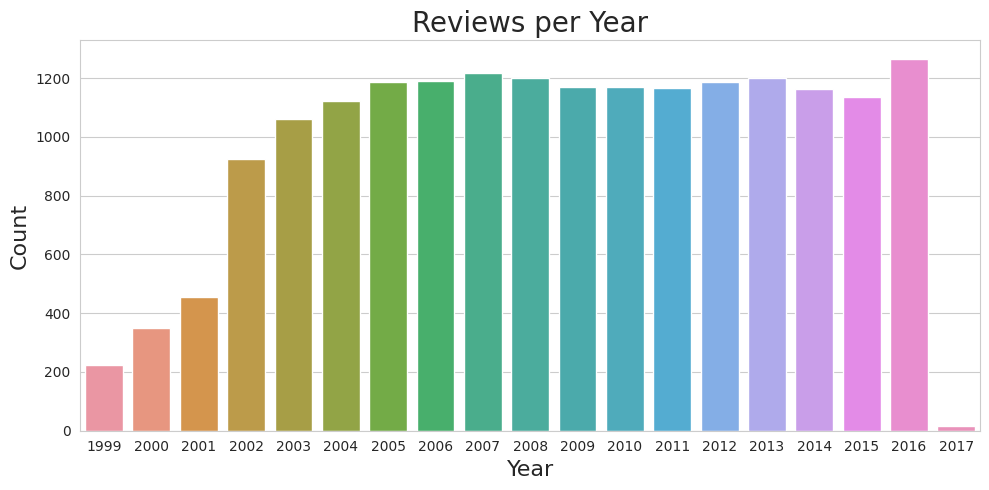

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(data = review_year, x = 'pub_year', y ='count')
plt.title('Reviews per Year',fontsize = 20)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Count',fontsize = 16)
plt.tight_layout()
plt.show()